In [1]:
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:

path= pd.read_csv('donante_ene_jun_2019.csv', encoding = 'unicode_escape')
#file = path.drop(['Mes/Año','Hospital Generador de la Donación','Hospital de destino'], axis=1)
file=path
#file = file.drop(file[file['Edo'] == 'Querétaro'].index)
file = file.drop(file[file['ID donante'] == '2019-04'].index)
file = file.drop(file[file['Hospital de destino'] == 'HOSPITAL GENERAL DE QUERETARO\xa0, Qro'].index)
file = file.drop(file[file['Hospital de destino']== 'MEDICA TEC 100 S.A. DE C.V'].index)

In [3]:
file

,Mes/Año,ID donante,Órgano/Tejido donado,Hospital Generador de la Donación,Hospital de destino,Edo
0,ene-19,2019-01,CÓRNEA IZQUIERDA,HOSPITAL GENERAL DE VALLES,HOSPITAL GENERAL DE ZONA No. 50,San Luis Potosí
1,ene-19,2019-01,CÓRNEA DERECHA,HOSPITAL GENERAL DE VALLES,HOSPITAL GENERAL DE ZONA No. 50,San Luis Potosí
2,ene-19,2019-01,RIÑÓN DERECHO,HOSPITAL GENERAL DE VALLES,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
3,ene-19,2019-01,RIÑÓN IZQUIERDO,HOSPITAL GENERAL DE VALLES,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
4,ene-19,2019-01,HUESO,HOSPITAL GENERAL DE VALLES,INSTITUTO MEXICANO DE BIOTECNOLOGÍA,Jalisco
5,ene-19,2019-01,PIEL,HOSPITAL GENERAL DE VALLES,INSTITUTO MEXICANO DE BIOTECNOLOGÍA,Jalisco
6,ene-19,2019-02,CÓRNEA IZQUIERDA,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""","HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
7,ene-19,2019-02,CÓRNEA DERECHA,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""","HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
8,ene-19,2019-02,RIÑÓN DERECHO,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""","HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
9,ene-19,2019-02,RIÑÓN IZQUIERDO,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""","HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí


In [4]:
#Creamos una matriz con los datos
dataset = file.values
#Dividimos en X y y
X = dataset[:, :-1]
y = dataset[:,-1]
#Forzamos el tipo string
X = X.astype(str)

In [5]:
#Preparamos los datos de entrada, X
def prepare_inputs(X_train, X_test):
    oe = OrdinalEncoder()
    oe.fit(X_train)
    X_train_enc = oe.transform(X_train)
    X_test_enc = oe.transform(X_test)
    return X_train_enc, X_test_enc
 
#Preparamos los datos de salida, y
def prepare_targets(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos ay
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_enc, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_enc)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')


Accuracy/exactitud: 100.00 %


In [7]:
file

,Mes/Año,ID donante,Órgano/Tejido donado,Hospital Generador de la Donación,Hospital de destino,Edo
0,ene-19,2019-01,CÓRNEA IZQUIERDA,HOSPITAL GENERAL DE VALLES,HOSPITAL GENERAL DE ZONA No. 50,San Luis Potosí
1,ene-19,2019-01,CÓRNEA DERECHA,HOSPITAL GENERAL DE VALLES,HOSPITAL GENERAL DE ZONA No. 50,San Luis Potosí
2,ene-19,2019-01,RIÑÓN DERECHO,HOSPITAL GENERAL DE VALLES,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
3,ene-19,2019-01,RIÑÓN IZQUIERDO,HOSPITAL GENERAL DE VALLES,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
4,ene-19,2019-01,HUESO,HOSPITAL GENERAL DE VALLES,INSTITUTO MEXICANO DE BIOTECNOLOGÍA,Jalisco
5,ene-19,2019-01,PIEL,HOSPITAL GENERAL DE VALLES,INSTITUTO MEXICANO DE BIOTECNOLOGÍA,Jalisco
6,ene-19,2019-02,CÓRNEA IZQUIERDA,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""","HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
7,ene-19,2019-02,CÓRNEA DERECHA,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""","HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
8,ene-19,2019-02,RIÑÓN DERECHO,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""","HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí
9,ene-19,2019-02,RIÑÓN IZQUIERDO,"HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""","HOSPITAL CENTRAL ""DR. IGNACIO MORONES PRIETO""",San Luis Potosí


In [8]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 1.388889
Característica 1: 5.283784
Característica 2: 0.589623
Característica 3: 1.156250
Característica 4: 18.164773
Accuracy/exactitud: 100.00 %


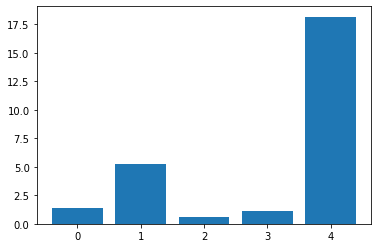

In [9]:
#Dividimos los datos de entrada, X, y salida, y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')

In [10]:
#Selección de características
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=mutual_info_classif, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    
    for i in range(len(fs.scores_)):
        print('Característica %d: %f' % (i, fs.scores_[i]))
    
    plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
    return X_train_fs, X_test_fs

Característica 0: 0.000000
Característica 1: 0.000000
Característica 2: 0.253095
Característica 3: 0.000000
Característica 4: 0.731490
Accuracy/exactitud: 100.00 %


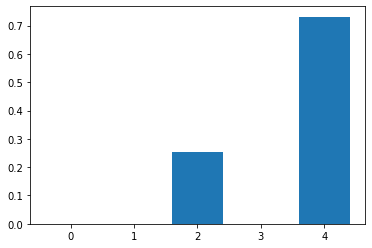

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
#Preparamos a X
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
#Preparamos a y
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
#Selección de características
X_train_fs, X_test_fs = select_features(X_train_enc, y_train_enc, X_test_enc)

#Buscamos el modelo
model = LogisticRegression(solver='lbfgs')
model.fit(X_train_fs, y_train_enc)

#Encontramos el modelo
yhat = model.predict(X_test_fs)

#Evaluamos el desempeño del modelo encontrado
accuracy = accuracy_score(y_test_enc, yhat)
print('Accuracy/exactitud: %.2f' % (accuracy*100), '%')